In [20]:
# imports for SAR
from SAR_tutorial_utils import *
import torch
torch.cuda.is_available()
def train(env_name, policy_name, timesteps, seed):
    """
    Trains a policy using sb3 implementation of SAC.
    
    env_name: str; name of gym env.
    policy_name: str; choose unique identifier of this policy
    timesteps: int; how long you want to train your policy for
    seed: str (not int); relevant if you want to train multiple policies with the same params
    """
    env = gym.make(env_name)
    env = Monitor(env)
    env = DummyVecEnv([lambda: env])
    env = VecNormalize(env, norm_obs=True, norm_reward=False, clip_obs=10.)
    
    net_shape = [400, 300]
    policy_kwargs = dict(net_arch=dict(pi=net_shape, qf=net_shape))
    
    model = SAC('MlpPolicy', env, learning_rate=linear_schedule(.001), buffer_size=int(3e5),
            learning_starts=1000, batch_size=256, tau=.02, gamma=.98, train_freq=(1, "episode"),
            gradient_steps=-1,policy_kwargs=policy_kwargs, verbose=1)
    
    succ_callback = SaveSuccesses(check_freq=1, env_name=env_name+'_'+seed, 
                             log_dir=f'{policy_name}_successes_{env_name}_{seed}')
    
    model.set_logger(configure(f'{policy_name}_results_{env_name}_{seed}'))
    model.learn(total_timesteps=int(timesteps), callback=succ_callback, log_interval=4)
    model.save(f"{policy_name}_model_{env_name}_{seed}")
    env.save(f'{policy_name}_env_{env_name}_{seed}')

In [15]:
import numpy as np

from sklearn.decomposition import PCA, FastICA

rng = np.random.RandomState(42)
S = rng.standard_t(1.5, size=(20000, 2))
S[:, 0] *= 2.0

# Mix data
A = np.array([[1, 1], [0, 2]])  # Mixing matrix

X = np.dot(S, A.T)  # Generate observations

pca = PCA()
S_pca_ = pca.fit(X).transform(X)

ica = FastICA(random_state=rng, whiten="arbitrary-variance")
S_ica_ = ica.fit(X).transform(X)  # Estimate the sources

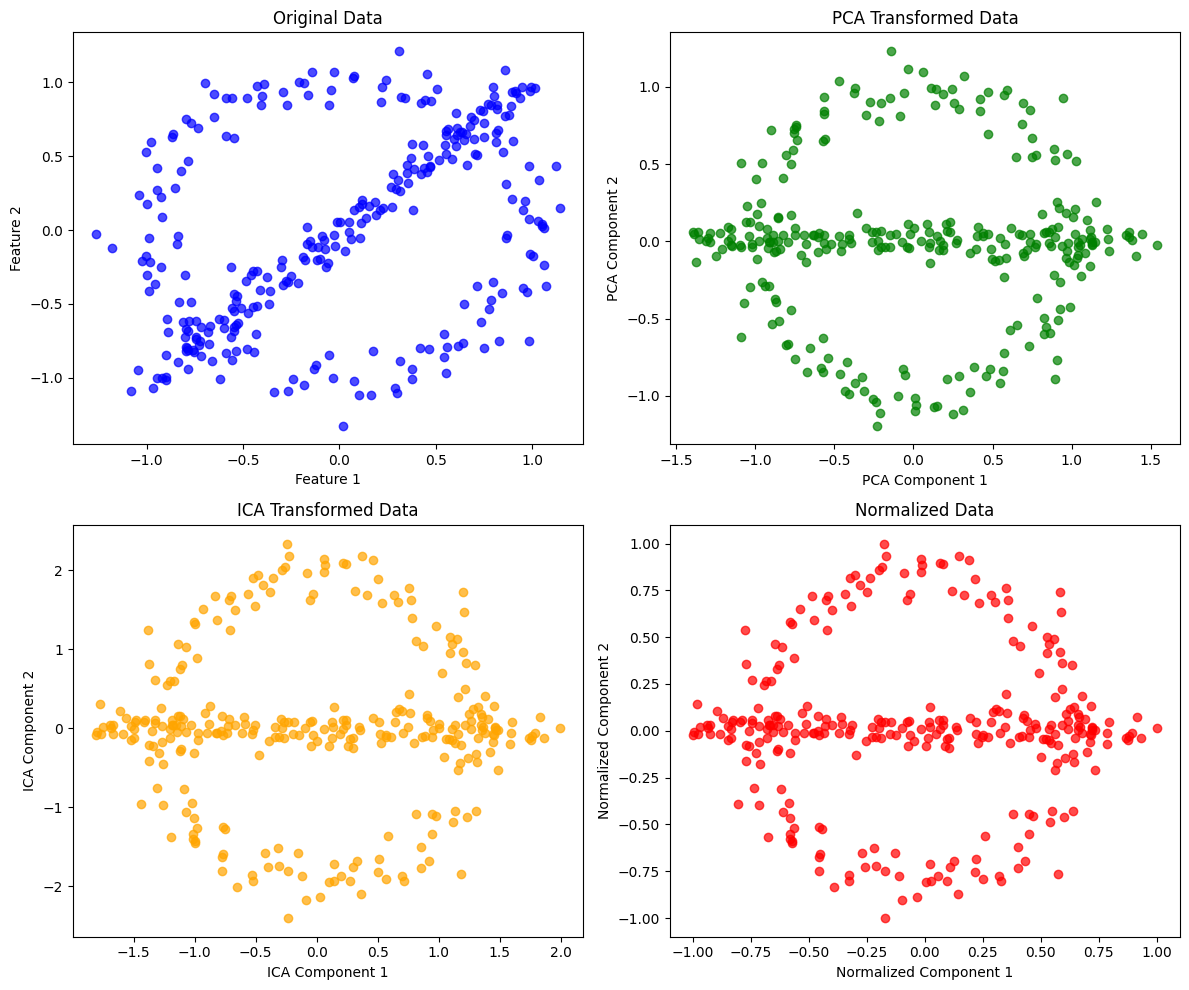

In [39]:
import numpy as np
from sklearn.decomposition import PCA, FastICA
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Generate a synthetic dataset with clear patterns
np.random.seed(42)
n_samples = 300

# Cluster 1: Circular pattern
theta = np.linspace(0, 2 * np.pi, n_samples // 2)
x1 = np.cos(theta) + 0.1 * np.random.randn(n_samples // 2)
y1 = np.sin(theta) + 0.1 * np.random.randn(n_samples // 2)

# Cluster 2: Linear pattern
x2 = np.linspace(-1, 1, n_samples // 2) + 0.1 * np.random.randn(n_samples // 2)
y2 = x2 + 0.1 * np.random.randn(n_samples // 2)

# Combine the clusters
X = np.vstack((np.hstack((x1, x2)), np.hstack((y1, y2)))).T

# Apply PCA
pca = PCA(n_components=2)
pca_act = pca.fit_transform(X)

# Apply ICA
ica = FastICA(n_components=2, random_state=42)
pcaica_act = ica.fit_transform(pca_act)

# Normalize the ICA-transformed data
normalizer = MinMaxScaler((-1, 1))
normalized_data = normalizer.fit_transform(pcaica_act)

# Plot the results
plt.figure(figsize=(12, 10))

# Original Data
plt.subplot(2, 2, 1)
plt.title('Original Data')
plt.scatter(X[:, 0], X[:, 1], c='blue', alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# PCA Transformed Data
plt.subplot(2, 2, 2)
plt.title('PCA Transformed Data')
plt.scatter(pca_act[:, 0], pca_act[:, 1], c='green', alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# ICA Transformed Data
plt.subplot(2, 2, 3)
plt.title('ICA Transformed Data')
plt.scatter(pcaica_act[:, 0], pcaica_act[:, 1], c='orange', alpha=0.7)
plt.xlabel('ICA Component 1')
plt.ylabel('ICA Component 2')

# Normalized Data
plt.subplot(2, 2, 4)
plt.title('Normalized Data')
plt.scatter(normalized_data[:, 0], normalized_data[:, 1], c='red', alpha=0.7)
plt.xlabel('Normalized Component 1')
plt.ylabel('Normalized Component 2')

plt.tight_layout()
plt.show()

In [6]:
# !pip install --upgrade scikit-learn\

In [3]:
ica,pca,normalizer = load_locomotion_SAR()

/home/xliu227/miniconda3/envs/myosuite/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator FastICA from version 1.1.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/xliu227/miniconda3/envs/myosuite/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.1.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/xliu227/miniconda3/envs/myosuite/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.1.2 w

In [17]:
muscle_data = get_activations(name='play_period', env_name='myoLegWalk-v0', seed='0', episodes=1000)

/home/xliu227/miniconda3/envs/myosuite/lib/python3.8/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.get_obs to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.get_obs` for environment variables or `env.get_wrapper_attr('get_obs')` that will search the reminding wrappers.
  logger.warn(


KeyboardInterrupt: 

In [ ]:
ica.get_feature_names_out()
ica.get_params

In [22]:
torch._C._cuda_init()
torch.cuda.is_available()
!python -c "import torch; print(torch.__version__)"


2.4.1+cu121


In [35]:
def plot_results(smoothing=1000, experiment='locomotion', terrain=None):
    """
    Plots the results for the specified experiment and terrain.

    Parameters
    ----------
    smoothing : int, optional
        The window size for smoothing the results. Default is 1000.
    experiment : str, optional
        The type of experiment to plot results for. Must be either 'locomotion' or 'manipulation'. Default is 'locomotion'.
    terrain : str, optional
        The type of terrain for the 'locomotion' experiment. Default is None.
    """
    if not isinstance(smoothing, int) or smoothing < 1:
        raise ValueError("The smoothing value must be an integer greater than or equal to 1")

    smth = smoothing

    if experiment == 'locomotion':
        print(terrain)
        sar_rl_file = f'SAR-RL_results_myoLeg{terrain}TerrainWalk-v0_0/progress.csv'
        rl_e2e_file = f'RL-E2E_results_myoLeg{terrain}TerrainWalk-v0_0/progress.csv'

        if os.path.isfile(sar_rl_file): 
           
            a_df = pd.read_csv(sar_rl_file)
            # return a_df
            a_timesteps = a_df['time/total_timesteps'][:-smth]
            a_reward_mean = smooth(a_df['rollout/ep_rew_mean'], smth)[:-smth]
            plt.plot(a_timesteps, a_reward_mean, linewidth=3, label='SAR-RL')

        if os.path.isfile(rl_e2e_file):
            b_df = pd.read_csv(rl_e2e_file)
            b_timesteps = b_df['time/total_timesteps'][:-smth]
            b_reward_mean = smooth(b_df['rollout/ep_rew_mean'], smth)[:-smth]
            plt.plot(b_timesteps, b_reward_mean, linewidth=3, label='RL-E2E')

        plt.title(f'MyoLeg {terrain} locomotion task success comparison', size=14)

    elif experiment == 'manipulation':
        sar_rl_file = './SAR-RL_successes_myoHandReorient100-v0_0/success_myoHandReorient100-v0_0.npy'
        rl_e2e_file = './RL-E2E_successes_myoHandReorient100-v0_0/success_myoHandReorient100-v0_0.npy'

        if os.path.isfile(sar_rl_file):
            suc = np.load(sar_rl_file)
            suc = smooth(suc, smth)[:-smth]
            plt.plot(range(len(suc)), suc, linewidth=2.5, label='SAR-RL')

        if os.path.isfile(rl_e2e_file):
            suc = np.load(rl_e2e_file)
            suc = smooth(suc, smth)[:-smth]
            plt.plot(range(len(suc)), suc, linewidth=2.5, label='RL-E2E')

        plt.title(f'Success comparison on Reorient100', size=17)

    else:
        raise ValueError("experiment must be either 'locomotion' or 'manipulation'")

    plt.grid()

    plt.xlabel('environment iterations', fontsize=14)
    plt.ylabel('success/reward metric', fontsize=14)

    plt.legend(fontsize=11, loc='upper left')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

Stair


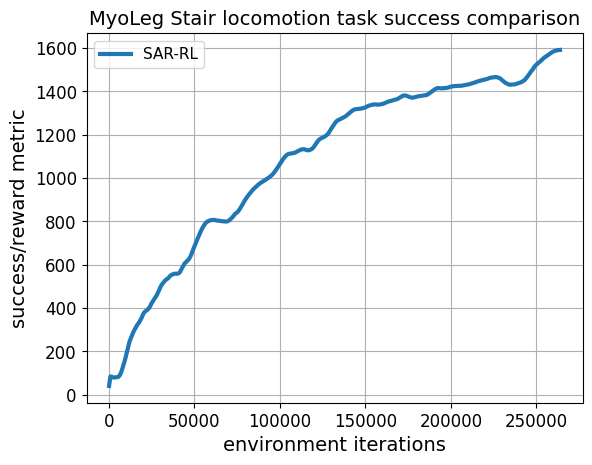

In [36]:
plot_results(smoothing=10, experiment='locomotion', terrain="Stair")

